## 1. Google Play Store apps and reviews
<p> Everyone uses mobile applications daily. With the development of technologies they are no longer hard to author. Given these reasons an increasing number of applications is being released. We will deep dive into the Android app market in Google Play across different categories. Our aim is to devise strategies to drive growth and retention.</p>
<p><img src="https://upload.wikimedia.org/wikipedia/commons/7/78/Google_Play_Store_badge_EN.svg" alt="Google Play logo"></p>
<p>First, the data is stored in:<code>apps.csv</code> details of the applications published on Google Play. There are 13 features that describe each app.</p>

In [13]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

In [1]:
all_apps = pd.read_csv("/home/gerri/Documents/ShareFiles/Data Files/apps.csv")

# Leave unique apps only
apps = all_apps.drop_duplicates(keep=False)

# Print the total number of apps
print('Total number of apps in the dataset = ', apps.shape[0])

# Inspect a random sample of 15 rows
print(apps.sample(15))

Total number of apps in the dataset =  9659
      Unnamed: 0                                                App  \
7087        8155                             SMS Sender - sluzba.cz   
3116        3914                                   Basketball Stars   
998         1222                                      Recipe Keeper   
855         1066                             Intesa Sanpaolo Mobile   
1998        2539                        Low Blood Pressure Symptoms   
364          416                                    Ninesky Browser   
7369        8463                      Euro Truck Driver (Simulator)   
5679        6710                                      B R COACHINGS   
7239        8323                                        DF@realtime   
2216        2833             YouCam Makeup - Magic Selfie Makeovers   
45            45  Canva: Poster, banner, card maker & graphic de...   
4984        5976                         BC Mobile Intro - Americas   
908         1122         MileIQ -

## 2. Data cleaning
<p>Data cleaning is one of the most important task any data project. It should never be undermined.</p>
<p>By looking at a random sample of the dataset, one can quickly see that there are special characters in some columns, like <code>Installs</code> and <code>Price</code> (<code>+</code> <code>,</code> <code>$</code>). We will work on these columns to transform them to only digits from [0-9].</p>
<p>A summary of the data frame would also be printed after performing the data cleaning to visually inspect the data set for potential human errors.</p>

In [2]:
# Characters to clean
clean_chars = ["$","+",","]

# Columns to clean
clean_cols = ["Installs","Price"]

for col in clean_cols:
    for char in clean_chars:
        apps[col] = apps[col].apply(lambda x: x.replace(char, ""))
        
# Summary of the apps dataframe
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB
None


## 3. Correcting data types
<p>During the previous step one can notice that <code>Installs</code> and <code>Price</code> are categorized as <code>object</code> data type (and not <code>int</code> or <code>float</code>). That is expected as in the raw data those had mixed inputs: digits and special characters.</p>
<p>The four features that we will focus our attention on are <code>Installs</code>, <code>Size</code>, <code>Rating</code> and <code>Price</code>. While <code>Size</code> and <code>Rating</code> are both purely numerical data types, there is still work to be done on <code>Installs</code> and <code>Price</code> to make them numeric.</p>

In [6]:
apps["Installs"] = apps["Installs"].astype(float)

apps["Price"] = apps["Price"].astype(float)

print(apps.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   float64
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   float64
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 1.0+ MB
None


## 4. Exploring app categories
<p>Google Play is an important distribution platform to build a global audience.Having an app quickly and easily discoverable on Google Play is an important task for all the companies present. Google has introduced the grouping of apps into categories to improve the overall user experience.</p>
<p>This brings us to a set of questions:</p>
<ul>
<li>Is a specific category dominating the market?</li>
<li>Which category has the highest number active apps? </li>
<li>Which categories have the fewest number of active apps?</li>
</ul>
<p>Out of the <code>33</code> categories of apps, prevailing are <em>Family</em> and <em>Game</em> apps. <em>Tools</em>, <em>Business</em> and <em>Medical</em> apps are also at the top.</p>

In [9]:
# Total categories
dist_categories = len(apps.Category.unique())
print('Distinct categories in the data set are ', dist_categories)

# Counts of apps in each 'Category'. 
apps_per_category = apps['Category'].value_counts()

# Sort the count of apps per category in descending order based on the counts
sorted_apps_per_category = apps_per_category.sort_values(ascending=False)

data = [go.Bar(
        x = sorted_apps_per_category.index, # index = category name
        y = sorted_apps_per_category.values, # value = count
)]

plotly.offline.iplot(data)

Distinct categories in the data set are  33


## 5. Distribution of app ratings
<p>Next logical question would be how apps perform on an average. App ratings impact the discoverability, conversion as well as the company's overall image. Rating is a key KPI for an app.</p>
<p>The average rate across all app categories is <code>4.17</code>. The histogram is skewed to the left indicating that the majority of the apps are highly rated with only a few exceptions.</p>

In [10]:
# Average app rating
avg_rating = apps.Rating.mean()
print('Average app rating = ', avg_rating)

# Distribution of apps based on rating
data = [go.Histogram(
        x = apps['Rating']
)]
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_rating,
              'y0': 0,
              'x1': avg_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.173243045387994


## 6. Size and price of an app
<p>Next we can look into app size and price. If an app is too large, it may be difficult and/or expensive for users to download. Lengthy download times could turn users off before even seeing the application. We need not to forget that a user's device has a finite amount of free space. Some users expect their apps to be free or at least not a major expense.</p>
<p>How can we effectively come up with strategies to size and price our app?</p>
<ul>
<li>Does size of the app affect its rating? </li>
<li>Does price of the app affect its rating? </li>
<li>Do users prefer free apps over paid?</li>
<li>Do users really care about the size of an app? </li>
</ul>
<p>We can see that the majority of top rated apps (rating over 4) range from 2 MB to 20 MB. Also that the vast majority of apps' pricea is below \$10.</p>

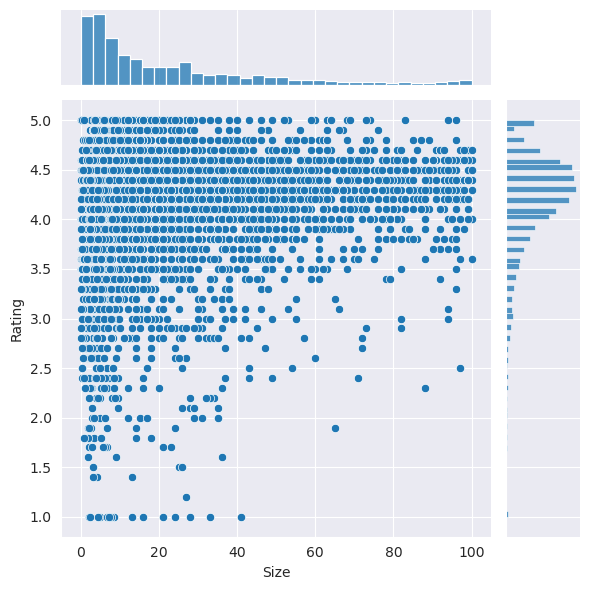

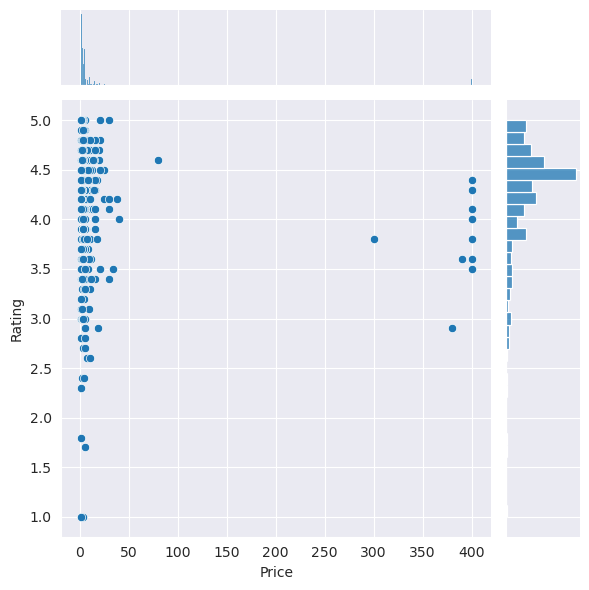

In [12]:
# Select only apps who have both 'Rating' and 'Size'
apps_size_rating = apps[(~apps['Rating'].isnull()) & (~apps['Size'].isnull())]

# Group categories with min 150 apps
large_categories = apps_size_rating.groupby(['Category']).filter(lambda x: len(x) >= 150)

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'])

# Select paid apps
paid_apps = apps_size_rating[apps_size_rating['Type']=='Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

## 7. Relation between app category and price
<p> What monetization strategies can companies use to maximize profit? The costs of apps are largely based on features, complexity, and platform.</p>
<p>It is important to consider the willingness of the target market to pay for the app. A wrong price could break the deal before the download even happens. Targeted users could be turned off by a perceived shocking cost, or they might give up after receiving too many ads or simply not getting their money's worth.</p>
<p>Different categories demand various price ranges. Some apps that are used daily and are plain should probably be kept free. However, it would make sense to charge for a highly-specialized technical app. From the data exploration, we quickly notice that <em>Medical and Family</em> apps are the most expensive. Some medical apps extend even over \$50! All game apps are priced below \$20.</p>

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99
4406,FAMILY,I Am Rich Pro,399.99


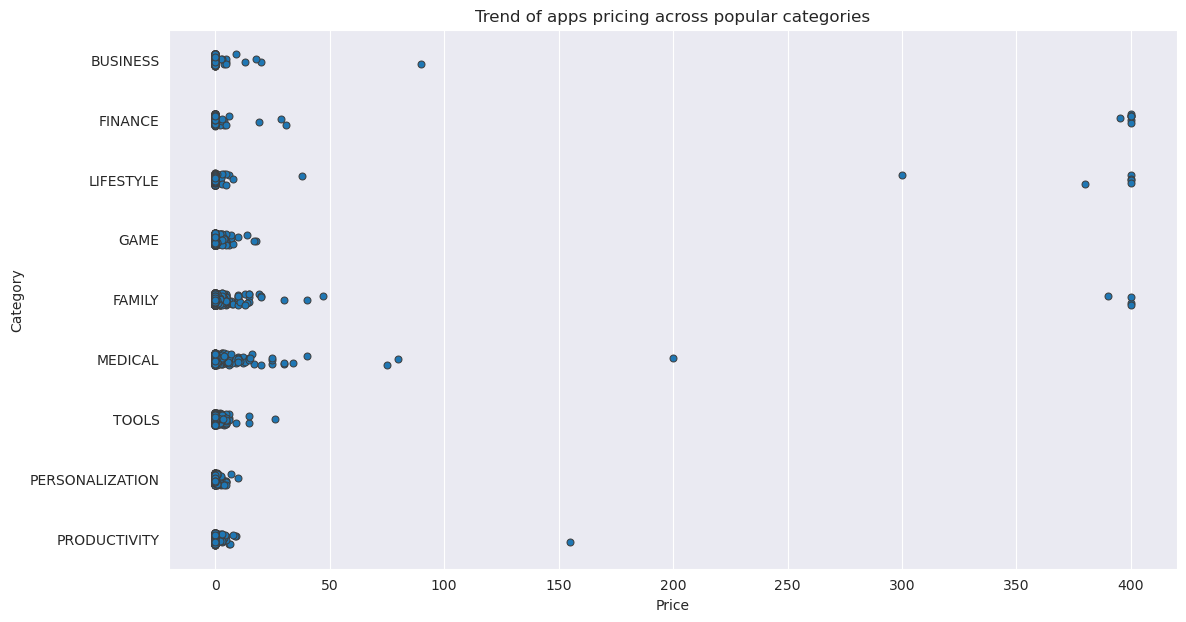

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 7)

# Select top 10 of the popular app categories
popular_cat_apps = apps[apps.Category.isin(['FAMILY','GAME','TOOLS','BUSINESS','MEDICAL',
                                           'PERSONALIZATION','PRODUCTIVITY',
                                              'LIFESTYLE','FINANCE', 'SPORT'
                                           ])]

# Price trend
ax = sns.stripplot(x = popular_cat_apps["Price"], y = popular_cat_apps["Category"], jitter=True, linewidth=0.75)
ax.set_title('Trend of apps pricing across popular categories')

# Apps with price over 300
apps_above_200 = apps[apps.Price>300]
apps_above_200[['Category', 'App', 'Price']]

## 8. Filter out "junk" apps
<p>Looks like a bunch of the really expensive apps are dummy/"junk" data. That is, apps that don't really have a purpose. A developer may create an app called <em>I Am Rich Premium</em> or <em>most expensive app (H)</em> just for a joke or for testing purposes. Some developers even do this with malicious intent.</p>
<p>Next step would be to filter out these and review our visualization.</p>

Text(0.5, 1.0, 'Trend of app prices across categories with dummy apps excluded')

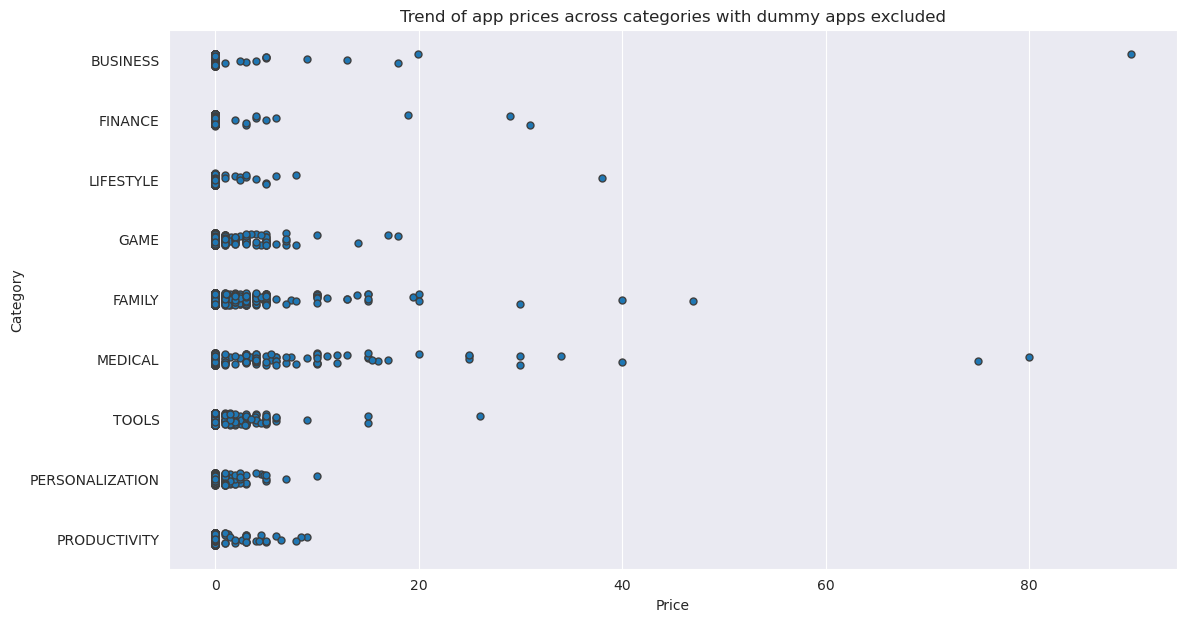

In [19]:
# Select apps with price below $100
apps_under_100 = popular_cat_apps[popular_cat_apps.Price<100]

fig, ax = plt.subplots()
fig.set_size_inches(13, 7)

# Examine price vs category
ax = sns.stripplot(x = apps_under_100.Price, y = apps_under_100.Category, data = apps_under_100, jitter = True, linewidth = 1)
ax.set_title('Trend of app prices across categories with dummy apps excluded')

## 9. Popularity of paid apps vs free apps
<p>Apps in the Play Store today, have a few types of pricing strategies to choose from: free, freemium, paid, paymium, and subscription. Let's focus on free and paid apps only. Some features of the free apps are:</p>
<ul>
<li>Free to download.</li>
<li>Main source of income often comes from ads.</li>
<li>Often created by companies that have other products and the app serves as an extension of their portfolio.</li>
<li>Can serve as a tool for customer retention, communication, and customer service.</li>
</ul>
<p>Some characteristics of paid apps are:</p>
<ul>
<li>Users are asked to pay once or on regular intervals for the app to use it.</li>
<li>The user can't really get a feel for the app before buying it.</li>
</ul>
<p>Are paid apps installed as much as free apps? Based on the data set, we can see that paid apps have a relatively lower number of installs compared to free, though the difference is not that stark.</p>

In [20]:
trace0 = go.Box(
    y = apps[apps['Type'] == "Paid"]['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    y = apps[apps['Type'] == "Free"]['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Downloads of paid vs. free",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})